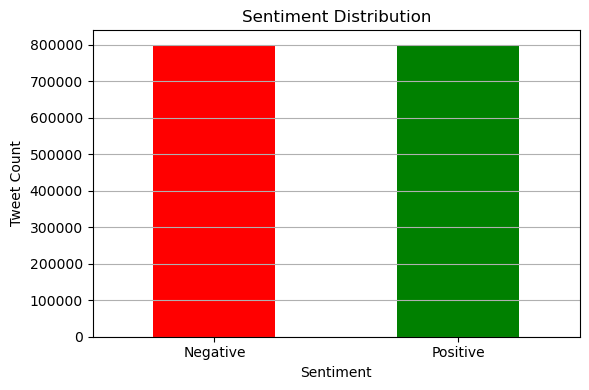

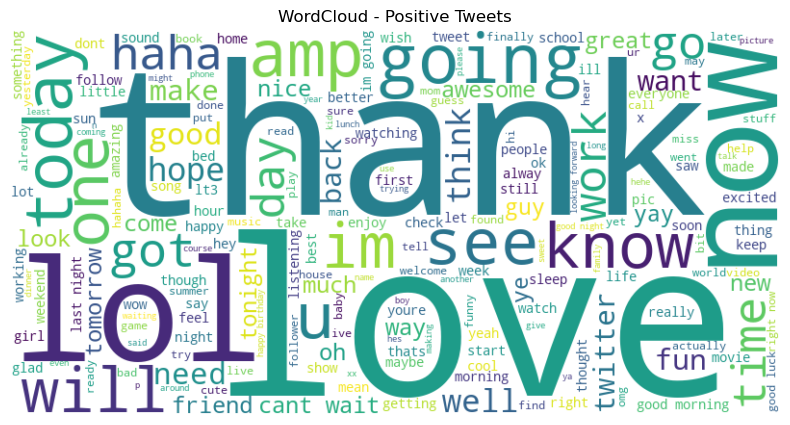

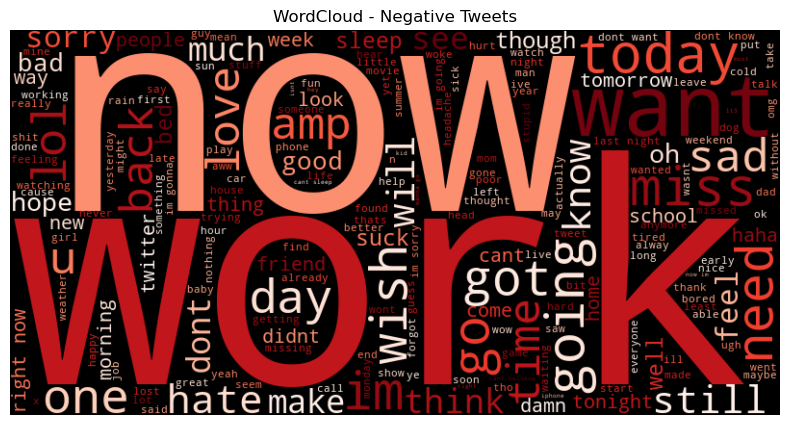


🔎 Accuracy: 0.772640625

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



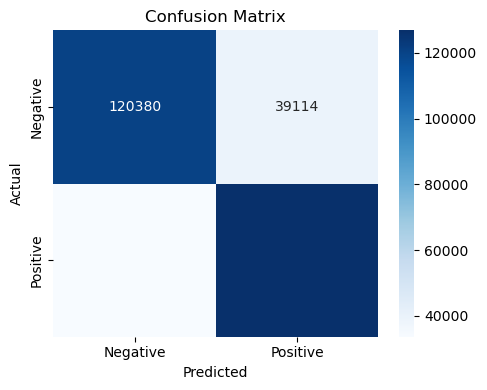

C:\Users\sathw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


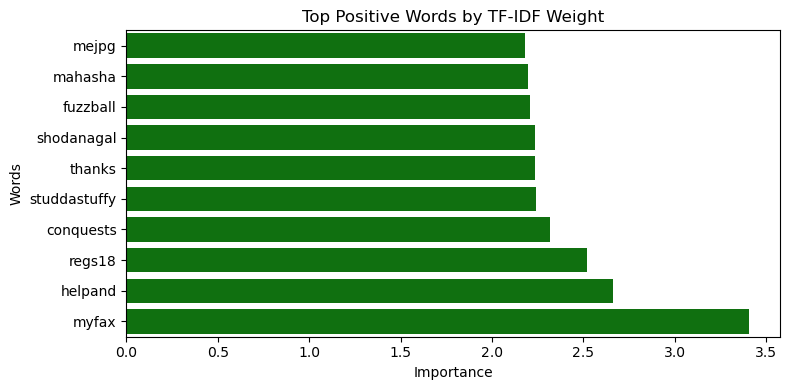

In [7]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 📥 Load dataset (ensure it's in your working directory)
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# 🎯 Keep only required columns and remap target
df = df[['text', 'target']]
df['target'] = df['target'].replace({0: 0, 4: 1})  # 0 = Negative, 1 = Positive

# 🔄 Optional: Use sample for faster processing (uncomment if needed)
# df = df.sample(10000, random_state=42)

# 🧹 Preprocessing function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions & hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# 📊 1. Sentiment Distribution
plt.figure(figsize=(6,4))
df['target'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Sentiment Distribution")
plt.xticks(ticks=[0,1], labels=["Negative", "Positive"], rotation=0)
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 🌐 2. WordCloud for Positive Tweets
positive_texts = " ".join(df[df['target'] == 1]['clean_text'].tolist())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Positive Tweets")
plt.show()

# 🌐 3. WordCloud for Negative Tweets
negative_texts = " ".join(df[df['target'] == 0]['clean_text'].tolist())
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_texts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Negative Tweets")
plt.show()

# 🧮 TF-IDF Feature Extraction
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['clean_text'])
y = df['target']

# 🎓 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train SVM Model
model = LinearSVC()
model.fit(X_train, y_train)

# 🔍 Predict and evaluate
y_pred = model.predict(X_test)
print("\n🔎 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# 🔢 4. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 🏷️ 5. Top 10 Positive Words by Weight (Optional)
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]

top_pos_indices = np.argsort(coefs)[-10:]
top_pos_words = [feature_names[i] for i in top_pos_indices]
top_pos_weights = coefs[top_pos_indices]

plt.figure(figsize=(8,4))
sns.barplot(x=top_pos_weights, y=top_pos_words, color='green')
plt.title("Top Positive Words by TF-IDF Weight")
plt.xlabel("Importance")
plt.ylabel("Words")
plt.tight_layout()
plt.show()
